# Laboratorio 1: Regresión utilizando Mínimos Cuadrados

En este laboratorio trabajaremos con la base de datos $<ejemplo\_regresion.mat>$. Estos datos representan
una señal para la cual se tienen las características $\bf{x}$, las etiquetas reales $\bf{y}$ (sin ruido) y las
observaciones ruidosas $\bf{t}$. La siguiente figura muestra una representación de los datos descritos.

Primero debemos adicionar algunas librerías sobre las cuales vamos a trabajar durante el módulo

1. matplotlib.pyplot 
2. numpy 
3. math
4. scipy.io 

Con el objetivo de importar una librería debemos realizar el siguiente comando:

$\textbf{import}$ $nombreLib$ $\textbf{as}$ $variableNombreLib$

El término $variableNombreLib$ indica la etiqueta con la cual llamaremos dicha librería. Algunas de las librerías mas importantes son

In [1]:
import matplotlib.pyplot as plt # Libreria para graficar y visualizar resultados
import numpy as np # libreria de manejo de datos matriciales y operaciones multivariadas
import math # Libreria de opreaciones matematicas
import scipy.io as sio # Libreria para cargar o escribir datos (Se utilizara para cargar nuestros DATASETS)
%matplotlib inline 

Para cargar nuestro $DATASET$, utilizaremos la función $\textbf{loadmat}$ de la librería $\textbf{sio}$ de la forma

$dataSet$ = $\textbf{sio.loadmat}$$('nombredelarchivoFormatoMAT.mat')$

In [2]:
data = sio.loadmat('ejemplo_regresion.mat')
# los datos pueden ser verificados con la funcion print datosAmostrar
print data

{'__header__': 'MATLAB 5.0 MAT-file, Platform: MACI, Created on: Sat Mar  5 12:45:05 2011', '__globals__': [], 't': array([[ 0.95674352],
       [ 0.83293055],
       [ 1.0104387 ],
       [ 1.02394094],
       [ 0.87656885],
       [ 1.10504857],
       [ 1.09823669],
       [ 0.96746694],
       [ 0.99434196],
       [ 0.96785882],
       [ 0.91883529],
       [ 0.9954574 ],
       [ 0.84761485],
       [ 1.10646786],
       [ 0.85429005],
       [ 0.85712854],
       [ 0.92819681],
       [ 0.80117116],
       [ 0.75730619],
       [ 0.65314327],
       [ 0.73318822],
       [ 0.53535126],
       [ 0.70347911],
       [ 0.75534705],
       [ 0.48264787],
       [ 0.59438556],
       [ 0.58872055],
       [ 0.25671764],
       [ 0.22287569],
       [ 0.37317009],
       [ 0.22345711],
       [ 0.27826401],
       [ 0.23521057],
       [ 0.16794224],
       [ 0.16776854],
       [ 0.04667165],
       [ 0.03924275],
       [-0.26024014],
       [-0.20239128],
       [-0.27651446],
    

Debido a que la variable $\bf{data}$ es un diccionario que contiene las variables $\bf{x}$, $\bf{t}$ y $\bf{y}$, es necesario extraerlas y asignarlas apropiadamente para su procesamiento. La forma de asignarlas a una respectiva variable es:

$variableDestino = diccName['nombreCampo']$

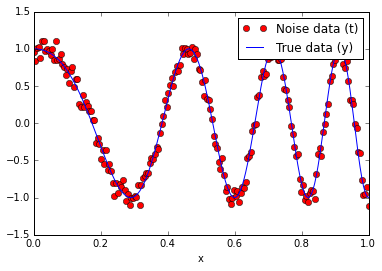

In [3]:
x = data['x'] # Se accede al campo x donde se encuentran las características del conjunto de entrenamiento
N,D = x.shape
t = data['t'] # Se accede al campo de las etiqueta (valores reales observados con ruido)
y = data['y'] # Se accede al campo de las etiquetas sin ruido (para verificacion)

plt.plot(x,t,'or')
plt.plot(x,y,'-b')
plt.xlabel('x')
plt.legend(('Noise data (t)', 'True data (y)'))

(200L, 1L) (140L, 1L)


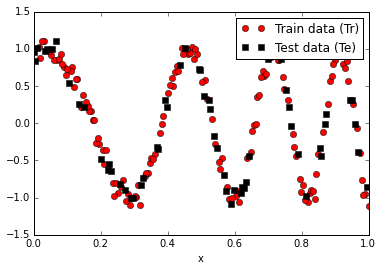

In [4]:
id = np.random.permutation(N)

perTrain = 0.7
NTr = int(round(perTrain*N))
idTr = id[:NTr]
idTe =id[NTr:]
xTr = x[idTr]
xTe = x[idTe]
tTr = t[idTr]
tTe = t[idTe]
print x.shape,xTr.shape
plt.plot(xTr,tTr,'or')
plt.plot(xTe,tTe,'sk')
plt.xlabel('x')
plt.legend(('Train data (Tr)', 'Test data (Te)'))



Luego de tener nuestros datos debidamente almacenados en sus respectivas variables debemos recordar que para una tarea de machine learning, nuestro conjunto de datos serán: 

$\bullet$  Observaciones para $\bf{X}=[\bf{x}_1,\bf{x}_2,\cdots, \bf{x}_N]\in \mathbb{R}^{N\times D}$, donde cada vector observado es de dimensionaledad $\bf{x}\in \mathbb{R}^{D\times 1}$

$\bullet$  Etiquetas (flotantes) para $\bf{t}\in \mathbb{R}^{N\times 1}$

Para realizar el experimento con el regresor lineal utilizando mínimos cuadrados, utilizaremos la librería $\bf LSfunction$. De esta librería, se utilizará el módulo $\bf linearRegressionModule$

el comando para importar un módulo de una librería es:

$\bf from$ $nombreLibreria$ $\bf import$ $nombreModulo$ $\bf as$ $variableParaNombrarMod$

In [5]:
# Se importa el módulo de regresión lineal y se le asigna el nombre de LS
from LSfunction import linearRegressionModule as LS        

Este módulo realiza la tarea de ajusta un conjunto de observaciones $\bf X$ a unas etiquetas $\bf t$ a partir de la selección del mapeo de una cantidad $M$ de funciones base que pueden ser de tipo polinomial, exponencial y sigmoidal. Estas funciones base permiten llevar nuestras observaciones a un espacio de representación mas relevante en el cual el ajuste de los datos presenta un mejor desempeño.

El módulo denominado $\bf LS$ se ejecuta de mediante el siguiente comando

$W\_ML, EtiquetaEstimada$ $=$ $\bf LS$$(observaciones,etiquetas,tipoFCNbase,M)$

Dicha función recibe cómo argumentos de entrada:

$\bullet$ observaciones: matriz de dimensión $\mathbb{R}^{N\times D}$ que contiene los patrones a modelar

$\bullet$ etiquetas: vector de dimensión $\mathbb{R}^{N\times 1}$ que contiene las etiquetas correspondientes a cada dato

$\bullet$ tipoFCNbase: dato tipo cadena para identificar el tipo de funcion base a utilizar. Esta cadena puede ser:

  $-$ 'pol': para una funcion de base polinomial
 
  $-$ 'exp': para una funcion de base exponencial
    
  $-$ 'sig': para una funcion de base sigmoidal
  
Dicha función tiene cómo argumentos de salida:

$\bullet$ $W\_ML$: vector de coeficientes que realiza la estimación de los datos de la forma $\hat{\bf{y}} = \bf{w}_{ML}^\top \phi(\bf{x}_n)$

$\bullet$ EtiquetaEstimada: vector de tamaño $\mathbb{R}^{N \times 1} $ que contiene las etiquetas estimadas para los respectivos $\bf X$

## Ajuste de una Función

En el siguiente ejemplo se observa el ajuste del conjunto de datos $\bf x$ utilizando una función de base polinomial, con $M = 15$ funciones base.

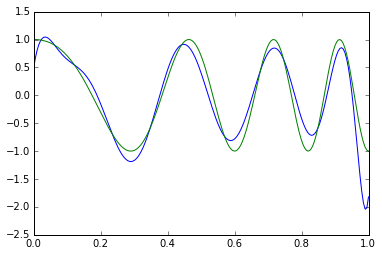

In [33]:
PHIb,w_ML,yEstimado = LS(x,t,'pol',15)
plt.plot(x,yEstimado)
plt.plot(x,y)

## Tarea

1. Realice la prueba de este mismo método de regresión utilizando diferentes funciones base y variando la cantidad de estas funcioens para realizar la regresión

2. Grafique los respectivos resultados y analice los diferentes comportamientos

### Preguntas

a. ¿ En que afecta la variacion de la cantidad de funciones base el resultado final de regressión?

b. ¿ Cómo se podría solucionar el problema en las zonas donde la señal no es bien modelada?


c. ¿ Que tipo de funcion base considera arrojar un mejor desempeño?

## Prueba 17 Feb LS

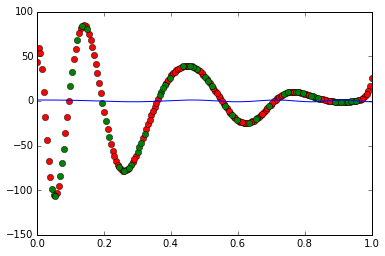

In [105]:
# -entrenar el modelo
PHITr,w_ML,yEstimadoTr = LS(xTr,tTr,'pol',150)
# Calcular PHITe
PHITe,w_MLTe,yEstimadoTe = LS(xTe,tTe,'pol',150)
yEstimadoTe = PHITe.dot(w_ML)
plt.plot(xTr,yEstimadoTr,'or')
plt.plot(xTe,yEstimadoTe,'og')
plt.plot(x,y)

In [106]:
def Erms(to,te):
    N,d = to.shape
    eRMS = np.sqrt((1.0/N)*np.sum((to-te)**2))
    return eRMS

In [107]:
RMStest = Erms(tTr,yEstimadoTr)
RMStrain = Erms(tTe,yEstimadoTe)

print RMStest,RMStrain

35.9731517474 44.2479041747


In [108]:
np.eye(5)

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

# LS con regularización

In [120]:
def LSReg(X,t,basisFNC,NbF,lambdaI):
    Ndata,D = X.shape
    I = np.eye(NbF+1)
    #print Ndata,D
    yEst = np.zeros((Ndata,1))
    # Calculo de la matriz PHI de funciones base
    PHI = np.zeros((Ndata,NbF+1))
    PHI[:,0] = 1
    for n in range(0,Ndata):
        #print X[n]
        for i in range(1,NbF+1):
            if basisFNC == 'pol':                
                PHI[n][i] = X[n]**(i)
# Luego se estima el mejor W que maximiza la verosimilitud utilizando minimos cuadrados
    PHIT = PHI.T
    w_ml = np.linalg.inv(lambdaI*I+PHIT.dot(PHI)).dot(PHIT.dot(t))
    yEst = PHI.dot(w_ml)
    #print w_ml
    return PHI,w_ml,yEst

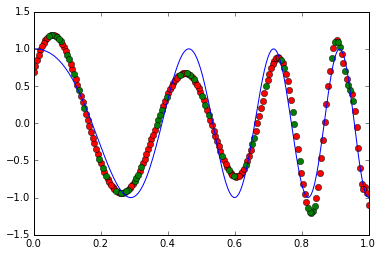

In [127]:

lambdaI = math.exp(-18.0)
#lambdaI = 0.
# -entrenar el modelo
PHITr,w_MLReg,yEstimadoTr = LSReg(xTr,tTr,'pol',150,lambdaI)
# Calcular PHITe
PHITe,w_MLRegte,yEstimadoTe = LSReg(xTe,tTe,'pol',150,lambdaI)
yEstimadoTe = PHITe.dot(w_MLReg)
plt.plot(xTr,yEstimadoTr,'or')
plt.plot(xTe,yEstimadoTe,'og')
plt.plot(x,y)

In [125]:
w_ML

array([[  4.37573642e+01],
       [  5.91768735e+03],
       [ -6.25460294e+05],
       [  1.54910969e+07],
       [ -1.79895699e+08],
       [  1.20534103e+09],
       [ -5.12075693e+09],
       [  1.43827316e+10],
       [ -2.67588876e+10],
       [  3.10199346e+10],
       [ -1.56645507e+10],
       [ -1.52872160e+10],
       [  4.51622773e+10],
       [ -6.10832989e+10],
       [  5.57849457e+10],
       [ -2.89286103e+10],
       [ -2.39476187e+09],
       [  1.91518534e+10],
       [ -2.16965408e+10],
       [  1.57708596e+10],
       [ -4.83388541e+09],
       [ -6.91543523e+08],
       [ -2.13854210e+09],
       [  3.10467580e+09],
       [  9.94526040e+07],
       [ -1.42322042e+09],
       [  3.48216314e+08],
       [  2.45840494e+08],
       [  2.75264541e+08],
       [ -7.68095598e+08],
       [  5.40467808e+08],
       [ -2.83983644e+08],
       [  2.55735852e+08],
       [ -6.36784928e+07],
       [ -7.60957770e+07],
       [  5.23225188e+07],
       [ -7.25308673e+07],
 

In [126]:
w_MLReg

array([[  2.43423708e-01],
       [ -5.31105518e-01],
       [ -4.35433522e-03],
       [  1.13788154e-01],
       [  1.21951781e-01],
       [  1.10549518e-01],
       [  9.84385855e-02],
       [  8.81853149e-02],
       [  7.94931948e-02],
       [  7.18351480e-02],
       [  6.48060195e-02],
       [  5.81129130e-02],
       [  5.15482353e-02],
       [  4.49764557e-02],
       [  3.83248178e-02],
       [  3.15724907e-02],
       [  2.47379641e-02],
       [  1.78663081e-02],
       [  1.10177986e-02],
       [  4.25873405e-03],
       [ -2.34534765e-03],
       [ -8.73423940e-03],
       [ -1.48557973e-02],
       [ -2.06672624e-02],
       [ -2.61355693e-02],
       [ -3.12369763e-02],
       [ -3.59562798e-02],
       [ -4.02858055e-02],
       [ -4.42243144e-02],
       [ -4.77759144e-02],
       [ -5.09490341e-02],
       [ -5.37554912e-02],
       [ -5.62096710e-02],
       [ -5.83278176e-02],
       [ -6.01274349e-02],
       [ -6.16267890e-02],
       [ -6.28445009e-02],
 

In [128]:
RMStest = Erms(tTr,yEstimadoTr)
RMStrain = Erms(tTe,yEstimadoTe)

print RMStest,RMStrain

0.21602495917 0.221118852485


(200L, 100L)


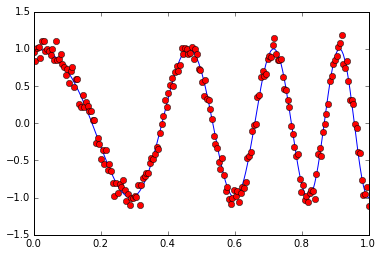

In [43]:
M = 100 # numero de funciones base
PHI,w_MLReg,yEstimadoTr = LS(x,t,'pol',M-1)
print PHI.shape
plt.plot(x,y)
plt.plot(x,t,'or')

# Sesion 24 Feb - Regresión Bayesiana

(100L, 1L) (100L, 100L)


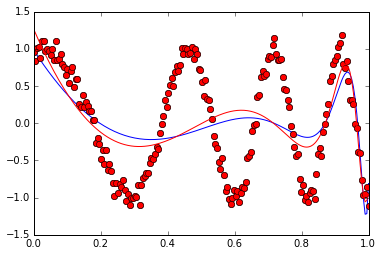

In [45]:
iT = 100 # Numero de iteraciones
alpha = 0.01
beta = 0.5
invbeta = 1/beta
PHIT = PHI.T
invSn = alpha*np.eye(M)+ beta*PHIT.dot(PHI)
Sn = np.linalg.inv(invSn)
mn = beta*Sn.dot(PHIT.dot(t))
print mn.shape,Sn.shape

# Probemos la estimacion con el mn inicial
yEst = PHI.dot(mn)
plt.plot(x,t,'or')
plt.plot(x,yEst,'-')
lambdaIp,vecI = np.linalg.eig(PHIT.dot(PHI))
lambdaI = beta*lambdaIp
#print lambdaI
for j in range(0,iT):
    gamma = np.sum(lambdaI/(alpha*np.ones(lambdaI.shape)+lambdaI))
    alpha = gamma/((mn.T).dot(mn))
    invbeta = (1/(N-gamma))*(((t-PHI.dot(mn)).T).dot(t-PHI.dot(mn)))
    beta = 1/invbeta
    lambdaI = beta*lambdaIp
    invSn = alpha*np.eye(M)+ beta*PHIT.dot(PHI)
    Sn = np.linalg.inv(invSn)
    mn = beta*Sn.dot(PHIT.dot(t))
    
#print invSn 
yEstfin = PHI.dot(mn)
plt.plot(x,t,'or')
plt.plot(x,yEstfin,'-r')

In [33]:
vA = [1., 2., 3., 4.]
vB = 3.*np.ones((1,4))+vA
print vB 
vC = vA/vB
print vC

[[ 4.  5.  6.  7.]]
[[ 0.25        0.4         0.5         0.57142857]]


In [38]:
N

200L